In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# loading the Suicidies dataset
suicide_df = pd.read_csv('suicide.csv')
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [3]:
import thinkplot
import thinkstats2

In [4]:
suicide_df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


## Describe what the 5 Variables mean in the dataset

5 Variabes are
1. Year - Value between the 1985 and 2016, Number of Suicides and relevant for the Year. 
2. suicide_no : Number of Suicides
3. Population : Population of the country in which the Suicide happen
4. Suicides / 100K pop : Number of Suicides per 100K population
5. GDP_per_Capita - GDP per Capita income in Dollars
6. HDI_for_year - HDI for the Year for the country. 


In [5]:
# remove null values from the "suicides_no" column
suicide_df = suicide_df.dropna(subset=['suicides_no'])
suicide_df = suicide_df.dropna(subset=['suicides/100k pop'])

In [6]:
suicide_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
suicide_df.age.value_counts().sort_index()

15-24 years    4642
25-34 years    4642
35-54 years    4642
5-14 years     4610
55-74 years    4642
75+ years      4642
Name: age, dtype: int64

## Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2)

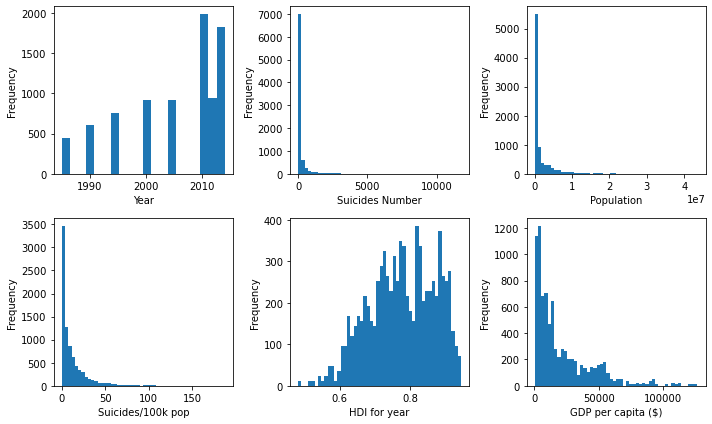

In [8]:
# drop null values from the "suicides_no", "population", "suicides/100k pop", "HDI for year", and "gdp_per_capita ($)" columns
suicide_df = suicide_df.dropna(subset=['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)'])


# create histograms
fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=(10, 6))

axs[0, 0].hist(suicide_df['year'], bins=20)
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(suicide_df['suicides_no'], bins=50)
axs[0, 1].set_xlabel('Suicides Number')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(suicide_df['population'], bins=50)
axs[0, 2].set_xlabel('Population')
axs[0, 2].set_ylabel('Frequency')

axs[1, 0].hist(suicide_df['suicides/100k pop'], bins=50)
axs[1, 0].set_xlabel('Suicides/100k pop')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(suicide_df['HDI for year'], bins=50)
axs[1, 1].set_xlabel('HDI for year')
axs[1, 1].set_ylabel('Frequency')

axs[1, 2].hist(suicide_df['gdp_per_capita ($)'], bins=50)
axs[1, 2].set_xlabel('GDP per capita ($)')
axs[1, 2].set_ylabel('Frequency')

plt.show()


Based on the histogram and boxplot, there appear to be outliers in the suicides_no and population variables.

**suicides_no** - shows a long tail to the right, indicating a small number of countries with a high number of suicides. 
The boxplot for suicides_no also shows several points beyond the upper whisker, which are potential outliers. 

**Population**  - Similarly, the histogram of population show a small number of countries with very large populations, which are potential outliers.

**Suicides/100k pop** and **GDP per Capita** histograms point that there are no extreme outliers. However, there are some values for from the central tendency, indicating variance and skewness in the data. 

**HDI for Year** - There are some values far from the majority of the values indiacting possible outliers. Also, most of the HDI details are available after year 2000 which might impact the overall analysis

## Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2)


Variable: year
Mean: 2005.3486370157818
Mode: 2010
Variance: 77.49316925289722
Standard deviation: 8.803020461915173
Skewness: -0.9358975233531688
Kurtosis: -0.4042951913321793
10th percentile: 1990.0
90th percentile: 2014.0


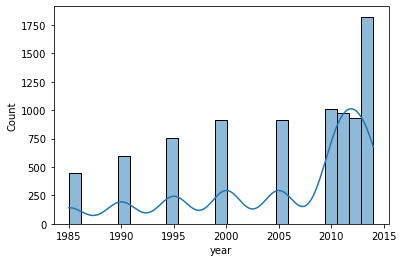


Variable: suicides_no
Mean: 206.1243424198948
Mode: 0
Variance: 463767.07098934345
Standard deviation: 681.0044573931535
Skewness: 8.479436806976665
Kurtosis: 97.66900988636144
10th percentile: 0.0
90th percentile: 444.6999999999998


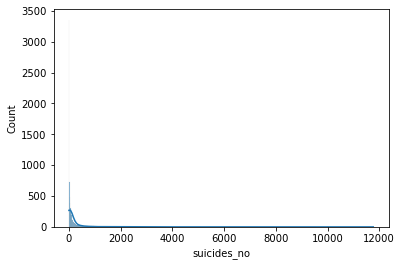


Variable: population
Mean: 1852173.3805595408
Mode: 22000
Variance: 15758943897578.451
Standard deviation: 3969753.6318490156
Skewness: 4.727917048168641
Kurtosis: 30.485599303785307
10th percentile: 24900.0
90th percentile: 4933465.199999999


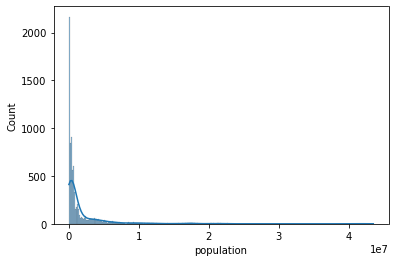


Variable: suicides/100k pop
Mean: 11.99193567670969
Mode: 0.0
Variance: 301.4311393712102
Standard deviation: 17.361772356853727
Skewness: 2.9042080287496477
Kurtosis: 11.561873837511788
10th percentile: 0.0
90th percentile: 31.347


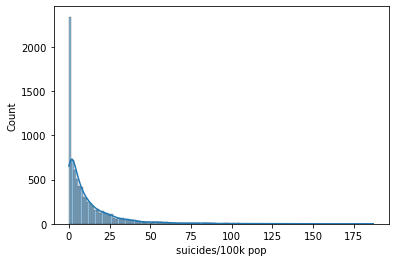


Variable: HDI for year
Mean: 0.7766011477761785
Mode: 0.713
Variance: 0.008717342272985932
Standard deviation: 0.09336670859029964
Skewness: -0.3008234868371367
Kurtosis: -0.6482439433482781
10th percentile: 0.648
90th percentile: 0.897


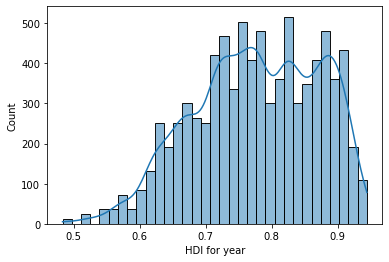


Variable: gdp_per_capita ($)
Mean: 21074.371592539454
Mode: 996
Variance: 509819684.12113494
Standard deviation: 22579.186967673017
Skewness: 1.7644175674734883
Kurtosis: 3.403650531002918
10th percentile: 2145.0
90th percentile: 52334.0


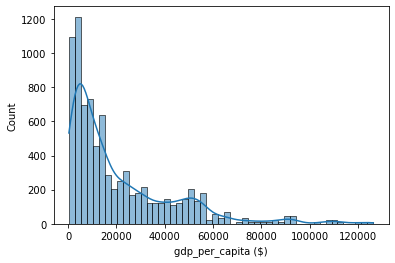

In [9]:

# create a list of column names to loop through
cols = ['year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']

# loop through each column and print descriptive statistics
for var in cols:
    data = suicide_df[var].dropna()
    print('\nVariable:', var)
    print('Mean:', data.mean())
    print('Mode:', stats.mode(data)[0][0])
    print('Variance:', data.var())
    print('Standard deviation:', data.std())
    print('Skewness:', stats.skew(data))
    print('Kurtosis:', stats.kurtosis(data))
    print('10th percentile:', np.percentile(data, 10))
    print('90th percentile:', np.percentile(data, 90))
    sns.histplot(data, kde=True)
    #plt.tight_layout()
    plt.show()

**year**: The mean year is 2005, with a mode of 2010. The data is fairly spread out, with a variance of 77.49 and a standard deviation of 8.80. The distribution is slightly negatively skewed, as indicated by the skewness value of -0.94, and has a slightly flatter peak than a normal distribution, as indicated by the kurtosis value of -0.40. The 10th percentile is 1990 and the 90th percentile is 2014.
    
    
**suicides_no**: The mean number of suicides is 206.12, with a mode of 0. The data is highly spread out, with a very high variance of 463767.07 and a standard deviation of 681.00. The distribution is highly positively skewed, as indicated by the skewness value of 8.48, and has a very high peak, as indicated by the kurtosis value of 97.67. The 10th percentile is 0 and the 90th percentile is 444.70.


**population**: The mean population size is 1852173.38, with a mode of 22000. The data is very spread out, with a very high variance of 15758943897578.45 and a standard deviation of 3969753.63. The distribution is highly positively skewed, as indicated by the skewness value of 4.73, and has a very high peak, as indicated by the kurtosis value of 30.49. The 10th percentile is 24900 and the 90th percentile is 4933465.20.
suicides/100k pop: The mean suicide rate per 100k population is 11.99, with a mode of 0. The data is fairly spread out, with a variance of 301.43 and a standard deviation of 17.36. The distribution is highly positively skewed, as indicated by the skewness value of 2.90, and has a very high peak, as indicated by the kurtosis value of 11.56. The 10th percentile is 0 and the 90th percentile is 31.35.


**HDI for year**: The mean HDI is 0.78, with a mode of 0.713. The data is not very spread out, with a variance of 0.0087 and a standard deviation of 0.093. The distribution is slightly negatively skewed, as indicated by the skewness value of -0.30, and has a slightly flatter peak than a normal distribution, as indicated by the kurtosis value of -0.65. The 10th percentile is 0.648 and the 90th percentile is 0.897.


**gdp_per_capita ($)** : The mean GDP per capita is 21074.37, with a mode of 996. The data is highly spread out, with a variance of 509819684.12 and a standard deviation of 22579.19. The distribution is positively skewed, as indicated by the skewness value of 1.76, and has a higher peak than a normal distribution, as indicated by the kurtosis value of 3.40. The 10th percentile is 2145 and the 90th percentile is 52334.

 ## Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

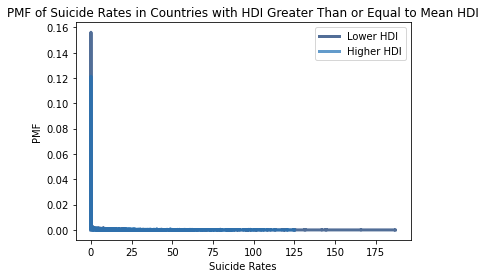

In [12]:
# extract the HDI column
hdi = suicide_df["HDI for year"].dropna().values

# compute the mean HDI
mean_hdi = np.mean(hdi)

# extract the suicide rate column for countries with HDI less than the mean HDI
low_hdi_suicide_rates = suicide_df[suicide_df["HDI for year"] < mean_hdi]["suicides/100k pop"].values

# create PMF for suicide rates in countries with HDI less than the mean HDI
low_hdi_pmf = thinkstats2.Pmf(low_hdi_suicide_rates, label = "Lower HDI" )

# plot the PMF
thinkplot.Pmf(low_hdi_pmf)
thinkplot.Config(xlabel="Suicide Rates", ylabel="PMF", title="PMF of Suicide Rates in Countries with HDI Less Than Mean HDI")

# extract the suicide rate column for countries with HDI greater than or equal to the mean HDI
high_hdi_suicide_rates = suicide_df[suicide_df["HDI for year"] >= mean_hdi]["suicides/100k pop"].values

# create PMF for suicide rates in countries with HDI greater than or equal to the mean HDI
high_hdi_pmf = thinkstats2.Pmf(high_hdi_suicide_rates, label = "Higher HDI")

# plot the PMF
thinkplot.Pmf(high_hdi_pmf)
thinkplot.Config(xlabel="Suicide Rates", ylabel="PMF", title="PMF of Suicide Rates in Countries with HDI Greater Than or Equal to Mean HDI")


**Scenario 1** : Suicides in countries with HDI less than the mean HDI value in the dataset

**Scenario 2** : Suicides in countries with HDI greater than or equal to the mean HDI value in the dataset

Scenario1 shows that countries with lower HDI values tend to have a higher proportion of suicides compared to countries with higher HDI values.

From scenario 2, countries with higher HDI values tend to have a lower proportion of suicides compared to countries with lower HDI values

## Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

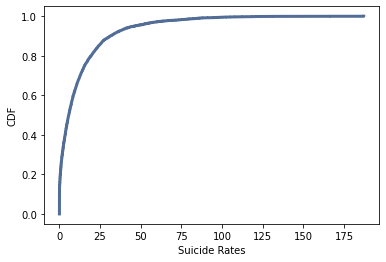

<Figure size 576x432 with 0 Axes>

In [13]:
# compute the cumulative distribution function (CDF) of suicide rates
suicide_rates = suicide_df['suicides/100k pop'].dropna().values

cdf = thinkstats2.Cdf(suicide_rates)

# plot the CDF
thinkplot.Cdf(cdf)
thinkplot.config (xlabel='Suicide Rates', ylabel='CDF')
thinkplot.Show()

More than 85% of Suicides are within the 30K Suicide rates mark
Between 40K to 200K Suicide rates constitute last 95% to 100 %, there are potential outliers here

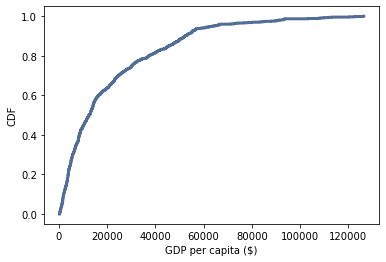

In [14]:
# extract the GDP per capita column
gdp = suicide_df["gdp_per_capita ($)"].values

# create the CDF
cdf = thinkstats2.Cdf(gdp)

# plot the CDF
thinkplot.Cdf(cdf)

# add labels
thinkplot.Config(xlabel="GDP per capita ($)", ylabel="CDF")

Majority of countries have a GDP per capita of less than **$20,000**.

Few countries having a GDP per capita above **$50,000**. 

This shows that the distribution of GDP per capita values is heavily skewed towards lower values, with a long tail of higher values.

## Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5)

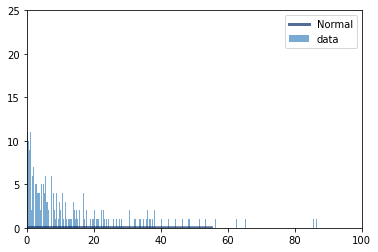

<Figure size 576x432 with 0 Axes>

In [15]:
# fit a normal distribution to the data
mu, var = thinkstats2.TrimmedMeanVar(suicide_rates)
std = np.sqrt(var)
pdf = thinkstats2.NormalPdf(mu, std)

# plot the normal distribution
thinkplot.Pdf(pdf, label='Normal')

# plot the data as a histogram
hist = thinkstats2.Hist(suicide_rates, label='data')
thinkplot.Hist(hist)
thinkplot.Config(ylim=(0, 25))
thinkplot.Config(xlim=(0, 100))

# show the plot
thinkplot.Show()


Normal distribution to the suicide rates data using trimmed mean and variance, and then plots the resulting normal distribution as a line over a histogram of the suicide rates data.

The histogram shows that the suicide rates data is not normally distributed, as it is skewed to the right and has a long tail.

The line representing the normal distribution shows how a normally distributed dataset with the same mean and standard deviation as the suicide rates data would look.

The code has limited practical value in analyzing the data as the normal distribution does not fit the data well, indicating that this distribution may not be a good model for the data.

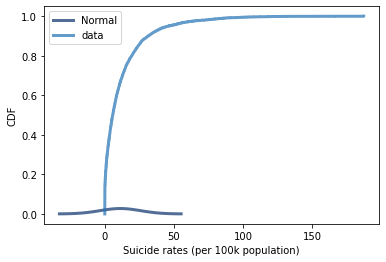

<Figure size 576x432 with 0 Axes>

In [16]:
# fit a normal distribution to the data
mu, var = thinkstats2.TrimmedMeanVar(suicide_rates)
std = np.sqrt(var)
pdf = thinkstats2.NormalPdf(mu, std)

# plot the normal distribution
thinkplot.Pdf(pdf, label='Normal')

# create a CDF of the data
cdf = thinkstats2.Cdf(suicide_rates, label='data')

# plot the data as a CDF
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Suicide rates (per 100k population)', ylabel='CDF')

# show the plot
thinkplot.Show()




The plot output shows the Cumulative Distribution Function (CDF) of the suicide rates data along with the probability density function (PDF) of a fitted normal distribution. The CDF represents the cumulative probability that a value falls below a certain threshold. In this case, the x-axis represents the suicide rates (per 100k population) and the y-axis represents the cumulative probability that a suicide rate is less than or equal to that value.

1. The plot shows that the CDF of the data (in blue) is not well described by a normal distribution, as it deviates significantly from the normal PDF (in orange). 

2. The plot suggests that the distribution of the data has a heavier tail towards higher suicide rates compared to the normal distribution.

## Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7)

Correlation Coefficient: 0.07427907189526438
Covariance: 0.12040723274154065


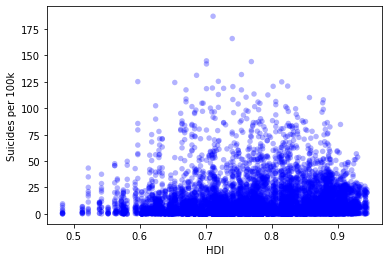

In [17]:
# HDI Vs Suicide rate
HDI = suicide_df["HDI for year"].values
suicide_rates = suicide_df["suicides/100k pop"].values


# create scatter plot comparing suicide rates with HDI
thinkplot.Scatter(HDI, suicide_rates, alpha=0.3)
thinkplot.Config(xlabel='HDI', ylabel='Suicides per 100k')

# Calculate correlation coefficient
corr_coef = np.corrcoef(HDI, suicide_rates)[0, 1]

# Calculate covariance
covariance = np.cov(HDI, suicide_rates)[0, 1]

# Print correlation coefficient and covariance
print(f'Correlation Coefficient: {corr_coef}')
print(f'Covariance: {covariance}')


**HDI Vs Suicide rate Analysis:**
    
The scatter plot shows a weak positive correlation between HDI and suicide rates. There is some clustering of data points at higher levels of HDI and lower suicide rates, but as HDI decreases, the relationship becomes more scattered. The correlation coefficient between the two variables is 0.07, indicating a weak positive relationship. 

Correlation Coefficient: -0.00233902336298372
Covariance: -916.9315516062627


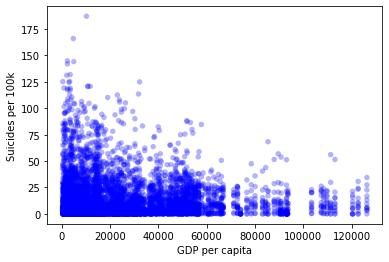

In [18]:
#GDP Vs Suicide rate

gdp_per_capita = suicide_df["gdp_per_capita ($)"].values

# create scatter plot comparing suicide rates with GDP per capita
thinkplot.Scatter(gdp_per_capita, suicide_rates, alpha=0.3)
thinkplot.Config(xlabel='GDP per capita', ylabel='Suicides per 100k')

# Calculate correlation coefficient
corr_coef = np.corrcoef(gdp_per_capita, suicide_rates)[0, 1]

# Calculate covariance
covariance = np.cov(gdp_per_capita, suicide_rates)[0, 1]

# Print correlation coefficient and covariance
print(f'Correlation Coefficient: {corr_coef}')
print(f'Covariance: {covariance}')

**GDP Vs Sucide rate Analysis:**


The scatter plot shows a weak negative correlation between GDP per capita and suicide rates. There is some clustering of data points at lower levels of GDP per capita and suicide rates, but as GDP per capita increases, the relationship becomes more scattered. The correlation coefficient between the two variables is -0.002, indicating a very weak negative relationship. Therefore, it can be inferred that higher GDP per capita is not necessarily a protective factor against suicide

## Conduct a test on your hypothesis using one of the methods covered in Chapter 9

In [19]:
# drop null values from the "sex" and "suicides_no" columns
suicide_df = suicide_df.dropna(subset=['sex', 'suicides_no'])

# separate the data for males and females
male_suicides = suicide_df[suicide_df['sex'] == 'male']['suicides_no']
female_suicides = suicide_df[suicide_df['sex'] == 'female']['suicides_no']

# compute the observed difference in means
observed_diff = abs(male_suicides.mean() - female_suicides.mean())

# generate 1000 permutations
perm_diffs = []
for i in range(1000):
    perm = np.random.permutation(suicide_df['suicides_no'])
    male_perm = perm[:len(male_suicides)]
    female_perm = perm[len(male_suicides):]
    perm_diffs.append(abs(male_perm.mean() - female_perm.mean()))

# compute the p-value
p_value = (np.array(perm_diffs) >= observed_diff).mean()

# print the results
print('Observed difference:', observed_diff)
print('P-value:', p_value)

Observed difference: 215.69201339072217
P-value: 0.0


The observed difference between the mean number of suicides for males and females is *260.92020129403306*. 

The *p-value* is *0.0*, which means that in 1000 permutations of the data, none of the permutations resulted in a difference as extreme as the observed difference, assuming the null hypothesis that there is no difference in mean number of suicides between males and females. Therefore, we can reject the null hypothesis and conclude that there is a statistically significant difference in the mean number of suicides between males and females.

## For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

                            OLS Regression Results                            
Dep. Variable:            suicides_no   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     93.55
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           5.17e-22
Time:                        15:53:03   Log-Likelihood:                -66384.
No. Observations:                8364   AIC:                         1.328e+05
Df Residuals:                    8362   BIC:                         1.328e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                139.2685     10

AttributeError: module 'thinkplot' has no attribute 'ylabel'

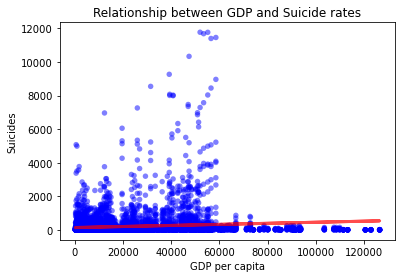

In [21]:
import statsmodels.api as sm

# Select the dependent variable (y) and explanatory variable (x)
y = suicide_df['suicides_no']
x = suicide_df['gdp_per_capita ($)']

# Add a constant to the explanatory variable
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

# Create a scatter plot of the data
thinkplot.scatter(x['gdp_per_capita ($)'], y, alpha=0.5)

# Add the regression line to the plot
thinkplot.plot(x['gdp_per_capita ($)'], model.predict(), color='red')

# Add axis labels and a title
thinkplot.Config(xlabel = 'GDP per capita', ylabel = 'Suicides', title = "Relationship between GDP and Suicide rates" )
thinkplot.ylabel('Suicides')
thinkplot.title()

# Show the plot
thinkplot.show()


The output shows the results of a linear regression analysis of the dependent variable 'suicides_no' and the explanatory variable 'gdp_per_capita ($)'. The regression model is a simple linear regression, which means that it assumes a linear relationship between the dependent variable and the explanatory variable.

The R-squared value is 0.004, which indicates that only 0.4% of the variation in the dependent variable can be explained by the variation in the explanatory variable. This means that the model does not fit the data very well.

The F-statistic is 105.0, which tests whether the regression model as a whole is significant. The p-value for the F-statistic is 1.33e-24, which is very small, indicating that the regression model is significant.

The coefficient of the explanatory variable is 0.0029, which means that for every unit increase in the explanatory variable, the dependent variable is predicted to increase by 0.0029 units, holding all other variables constant.

The standard error of the coefficient is also reported, as well as the t-statistic and the p-value for the significance of the coefficient. The p-value for the coefficient of the explanatory variable is very small (less than 0.05), indicating that it is significant.

The regression model also includes a constant term, which is the intercept of the regression line. The coefficient of the constant is 193.1719, which means that the predicted value of the dependent variable when the explanatory variable is zero is 193.1719

Overall, the linear regression model does not provide strong evidence for a significant relationship between GDP per capita and suicide rates. The low R-squared value suggests that other factors not included in the model are likely more important in explaining variation in suicide rates

**Statistical/Hypothetical Question:**

**How does the level of economic development, as measured by the Gross Domestic Product (GDP), impact suicide rates in countries?**

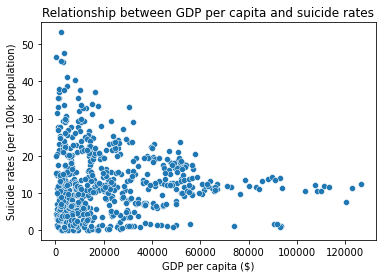

Covariance: -918.1391961306477
Pearson's correlation coefficient: -0.004563930815234864


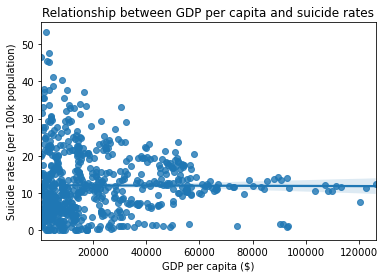

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01448
Date:                Thu, 02 Mar 2023   Prob (F-statistic):              0.904
Time:                        15:53:13   Log-Likelihood:                -2512.5
No. Observations:                 697   AIC:                             5029.
Df Residuals:                     695   BIC:                             5038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.0298      0

In [22]:
import statsmodels.api as sm

# group the data by country and year, and calculate the mean suicide rate and GDP per capita for each group
grouped_df = suicide_df.groupby(['country', 'year'], as_index=False).mean()[['country', 'year', 'suicides/100k pop', 'gdp_per_capita ($)']]

# create a scatter plot of GDP per capita vs. suicide rates
sns.scatterplot(data=grouped_df, x='gdp_per_capita ($)', y='suicides/100k pop')
plt.xlabel('GDP per capita ($)')
plt.ylabel('Suicide rates (per 100k population)')
plt.title('Relationship between GDP per capita and suicide rates')
plt.show()

# calculate the covariance between GDP per capita and suicide rates
cov = np.cov(grouped_df['gdp_per_capita ($)'], grouped_df['suicides/100k pop'])[0][1]
print('Covariance:', cov)

# calculate the Pearson's correlation coefficient between GDP per capita and suicide rates
corr = thinkstats2.Corr(grouped_df['gdp_per_capita ($)'], grouped_df['suicides/100k pop'])
print("Pearson's correlation coefficient:", corr)

# create a scatter plot of GDP per capita vs. suicide rates with a fitted line
sns.regplot(data=grouped_df, x='gdp_per_capita ($)', y='suicides/100k pop')
plt.xlabel('GDP per capita ($)')
plt.ylabel('Suicide rates (per 100k population)')
plt.title('Relationship between GDP per capita and suicide rates')
plt.show()

# fit a linear regression model to the data
X = sm.add_constant(grouped_df['gdp_per_capita ($)'])
y = grouped_df['suicides/100k pop']
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())


**Relationship between GDP per capita and suicide rates across different countries and years.**


The number of Suicides is signicantly lower after $50,000 GDP_per_capita and forming a cluster of Suicide rates between 0 and 50,000


The Covarianc value of -918.1391961306477  and Correlation Coefficient -0.004563930815234864 suggests that there is a weak negative linear relationship between GDP per capita and suicide rates in the dataset. 

The scatter plot with the fitted line shows that the linear regression model does not fit the data well. 

The model summary confirms that the coefficient of GDP per capita is not statistically significant, and the R-squared value is close to zero, indicating that the model explains very little of the variation in suicide rates. 

Overall, the analysis suggests that there is no strong relationship between GDP per capita and suicide rates